In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

#Handling Missing values

In [2]:
df = pd.read_csv("Food_Delivery_Time_Prediction.csv")
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

#Descriptive Analysis

In [3]:
df.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.498050,5.250000,3.738500,3.686500,70.494950,1046.488700,46.616650
std,6.841755,2.745027,0.703021,0.697063,29.830694,548.568922,29.361706
min,0.520000,1.000000,2.500000,2.600000,15.230000,122.300000,1.240000
25%,6.090000,3.000000,3.200000,3.100000,46.997500,553.270000,21.602500
50%,10.265000,5.000000,3.800000,3.700000,72.775000,1035.950000,47.530000
75%,16.497500,8.000000,4.300000,4.300000,96.650000,1543.125000,70.245000
max,24.900000,10.000000,5.000000,5.000000,119.670000,1997.420000,99.740000


#There is no null value in the dataset

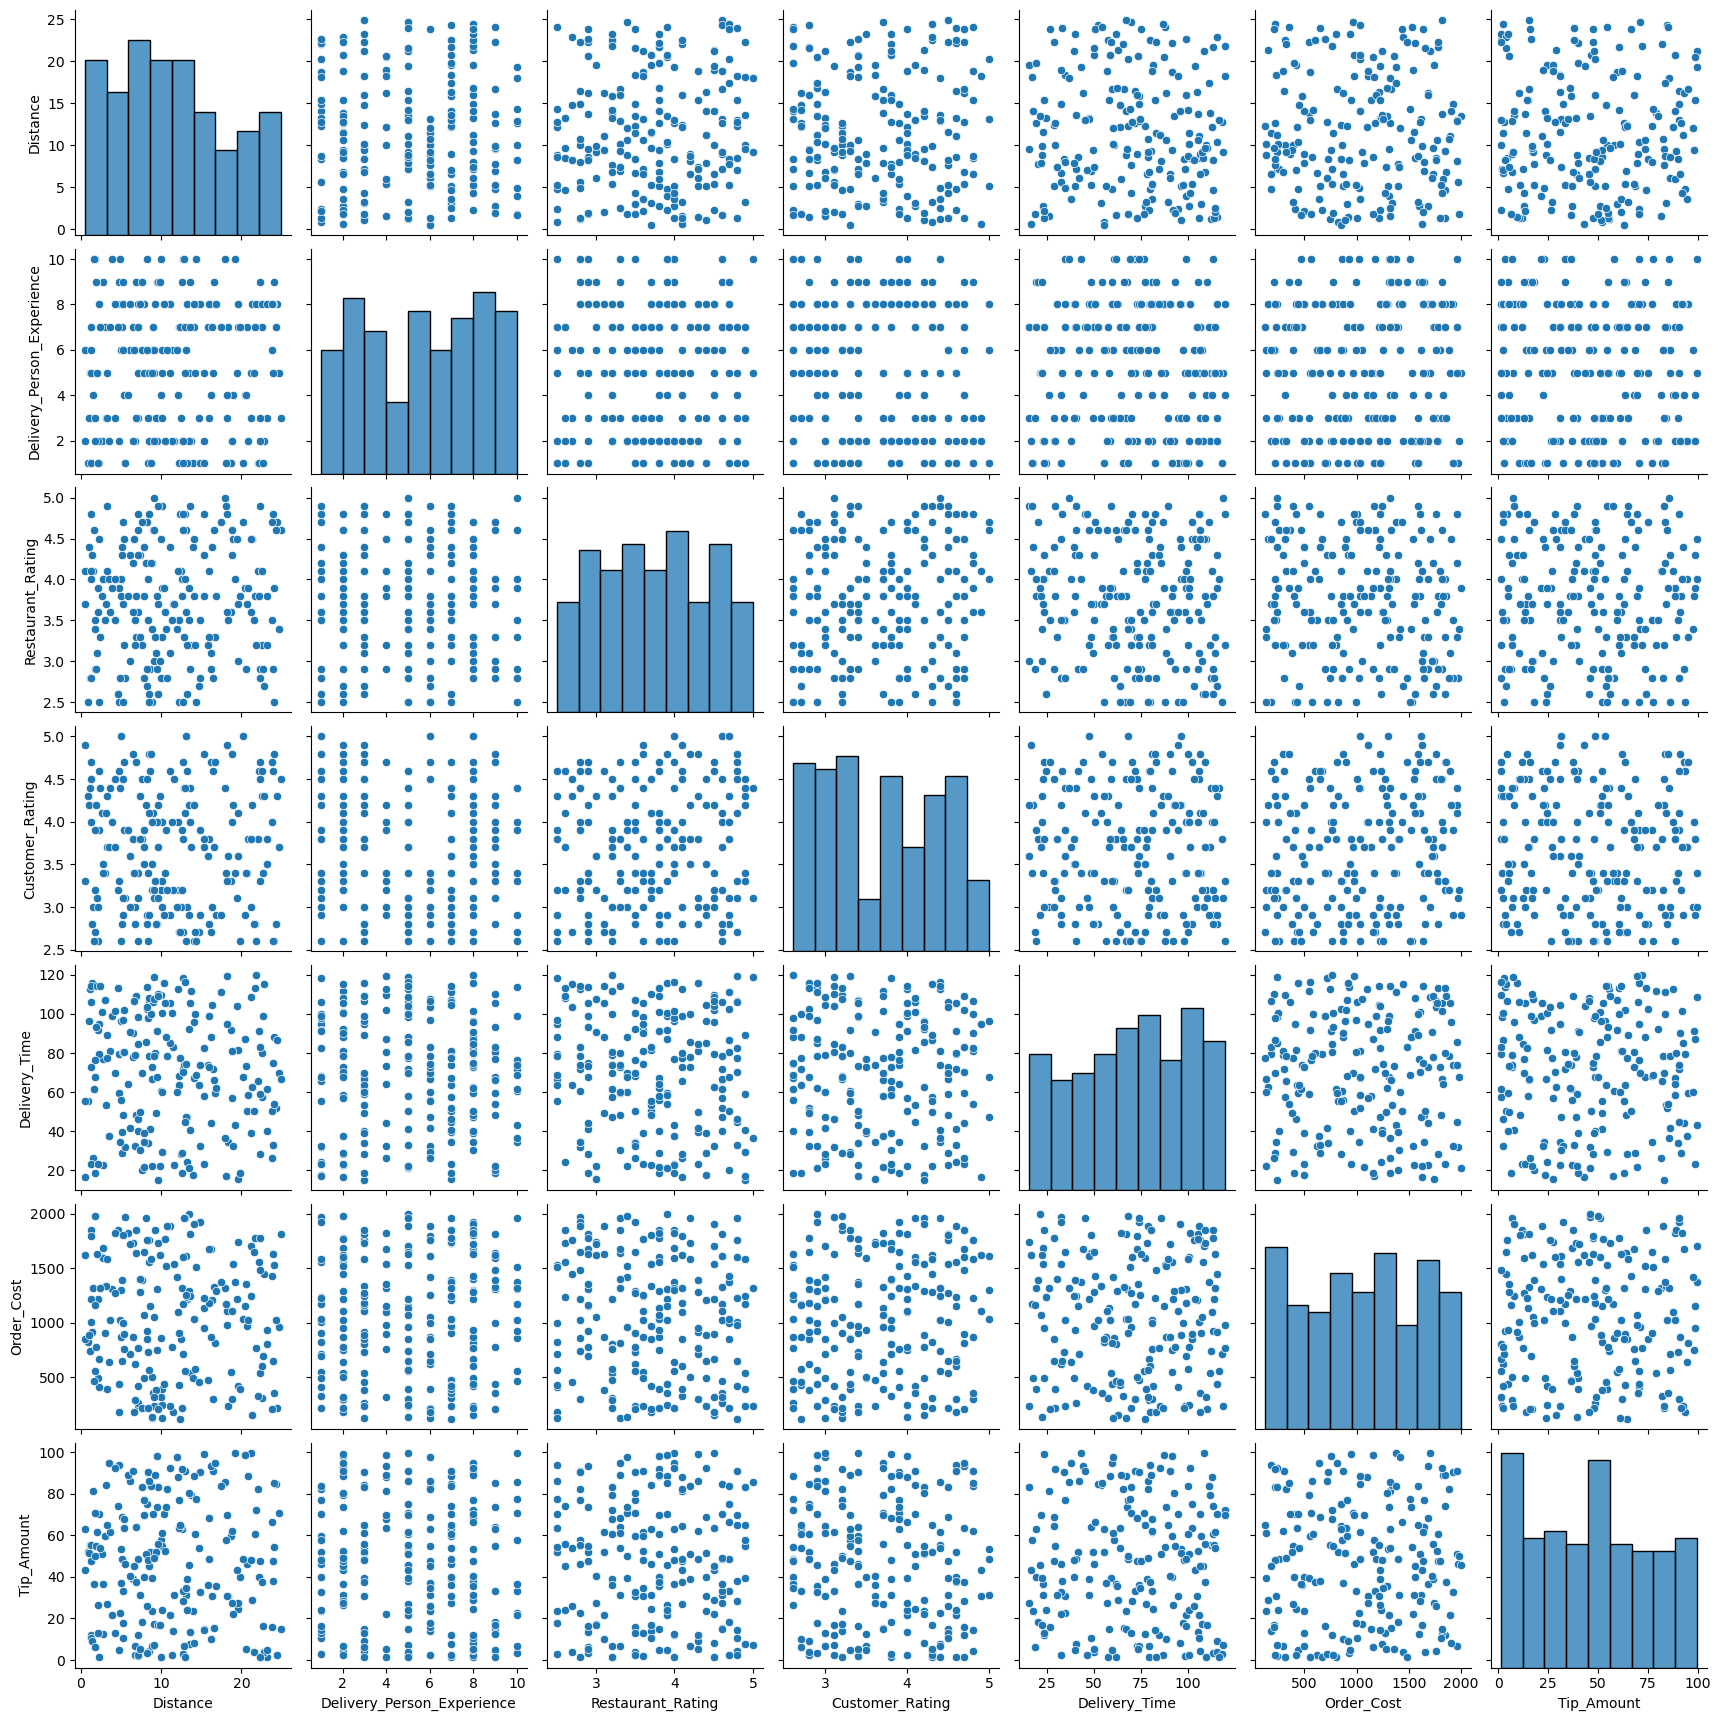

In [4]:
import matplotlib.pyplot as plt

num_features = df.select_dtypes(include=['int64', 'float64'])

# Create a pairplot
sns.pairplot(num_features)
plt.show()


In [24]:
corr = num_features.corr()
corr

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
Distance,1.000000,0.017562,0.064676,0.003430,-0.075143,-0.022275,-0.006466
Delivery_Person_Experience,0.017562,1.000000,-0.004492,-0.122447,-0.019098,0.061015,-0.069218
Restaurant_Rating,0.064676,-0.004492,1.000000,0.101661,-0.091855,-0.106870,-0.035759
Customer_Rating,0.003430,-0.122447,0.101661,1.000000,-0.021952,0.142336,-0.074884
Delivery_Time,-0.075143,-0.019098,-0.091855,-0.021952,1.000000,-0.009307,-0.029154
Order_Cost,-0.022275,0.061015,-0.106870,0.142336,-0.009307,1.000000,0.034462
Tip_Amount,-0.006466,-0.069218,-0.035759,-0.074884,-0.029154,0.034462,1.000000


In [25]:
print(corr['Delivery_Time'].sort_values(ascending=False))

Delivery_Time                 1.000000
Order_Cost                   -0.009307
Delivery_Person_Experience   -0.019098
Customer_Rating              -0.021952
Tip_Amount                   -0.029154
Distance                     -0.075143
Restaurant_Rating            -0.091855
Name: Delivery_Time, dtype: float64


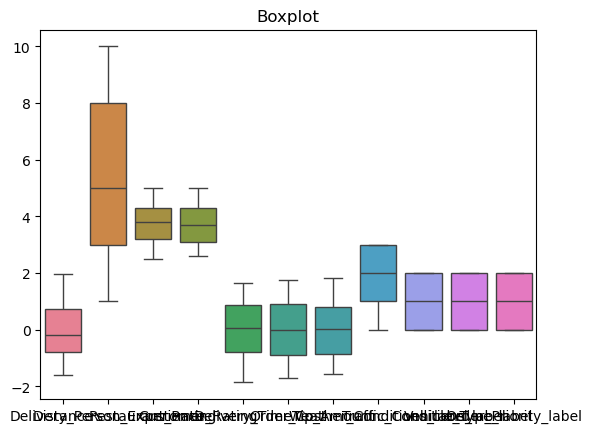

In [26]:
sns.boxplot(df)
plt.title("Boxplot")
plt.show()

In [27]:
le = LabelEncoder()
categorical_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type', 'Order_Priority']
for col in categorical_cols:
    df[col + '_label'] = le.fit_transform(df[col])

#Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
num_cols = ['Distance', 'Delivery_Time', 'Order_Cost', 'Tip_Amount']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [30]:
threshold = df['Delivery_Time'].mean()


#Splitting the data

In [31]:
X = df[['Distance', 'Weather_Conditions_label', 'Traffic_Conditions_label',
        'Vehicle_Type_label', 'Order_Cost', 'Tip_Amount']]
y = df['Delivery_Time']     
y = le.fit_transform(y)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
print(r2_score(y, model.predict(X_poly)))


0.3578956359428157


In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
print(r2_score(y, model.predict(X_poly)))


0.9832685593432795


In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_test)

In [34]:
y_pred

array([ 83.48949347,  90.96537802,  90.32468576,  92.31167075,
        89.47921408, 104.6438749 , 111.83725498,  95.22809708,
       108.0921587 ,  97.92820407,  86.94679669, 106.10478622,
        95.95820666,  99.92629582, 106.39323886,  94.64501562,
        88.61808372,  91.11259935, 104.02119935, 101.11872362,
        92.00779432,  99.61474834,  97.94889716,  94.00552785,
        96.13497382,  95.95829181, 114.6174021 , 107.670378  ,
        94.17290055, 103.97719517, 109.12430341, 101.25719585,
        99.08656777, 105.78280127,  85.47911656,  90.89218543,
       103.45081262,  96.65922612,  95.73739304, 109.44459507])

In [35]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 3410.269704186393
MAE: 50.08317090905669
R²: -0.0025936617238375703


In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
print("Cross-validated R²:", scores.mean())


Cross-validated R²: -0.14966871321565323


In [39]:
df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 'Fast' if x < threshold else 'Delayed')

In [40]:
df['Delivery_Status'] = df['Delivery_Status'].map({'Fast': 0, 'Delayed': 1})

In [41]:
X = df.drop('Delivery_Status', axis=1)
y = df['Delivery_Status']

In [42]:
log=LogisticRegression()

In [43]:
X = df[['Distance', 'Weather_Conditions_label', 'Traffic_Conditions_label',
        'Vehicle_Type_label', 'Order_Cost', 'Tip_Amount']]
y = df['Delivery_Status']  

In [44]:
y

0      0
1      0
2      0
3      1
4      0
      ..
195    0
196    1
197    1
198    0
199    1
Name: Delivery_Status, Length: 200, dtype: int64

In [45]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log, X, y, cv=6, scoring='accuracy')
print("Mean Accuracy:", scores.mean())


Mean Accuracy: 0.5554070112893642


In [46]:
log.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred= log.predict(X_test)

In [48]:
X_test

,Distance,Weather_Conditions_label,Traffic_Conditions_label,Vehicle_Type_label,Order_Cost,Tip_Amount
95,1.560810,3,1,2,0.933051,-0.234451
15,1.352740,2,2,2,-0.134940,-0.007056
30,1.846540,3,0,0,0.881716,0.270872
158,0.384189,2,0,1,1.568125,-1.318164
128,0.962975,3,2,2,0.223122,0.373644
115,0.477967,3,1,0,-1.084472,0.256532
69,-0.374826,3,1,0,-1.000736,-1.359477
170,-1.393196,2,0,1,1.068779,0.513290
174,-1.406384,1,2,1,-0.496840,0.286919
45,0.138022,1,1,1,-0.360819,0.618110


In [49]:
accuracy_score(y_test, y_pred)

0.525

In [50]:
precision_score(y_test, y_pred,average='macro')

0.5275689223057645

In [51]:
recall_score(y_test, y_pred,average='macro')

0.5277777777777778

In [52]:
f1_score(y_test, y_pred,average='macro')


0.5247029393370857

In [53]:
cm=confusion_matrix(y_test, y_pred)

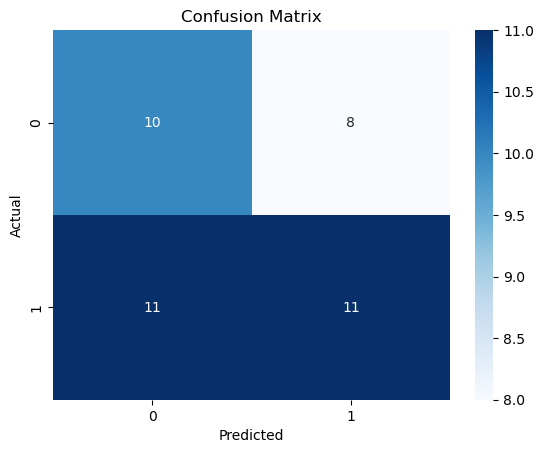

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


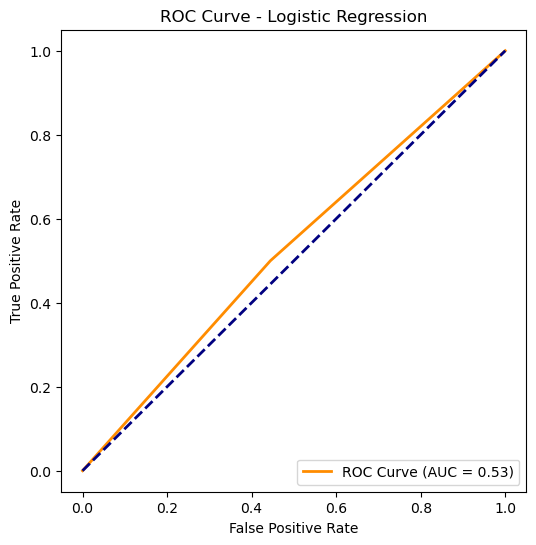

In [55]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


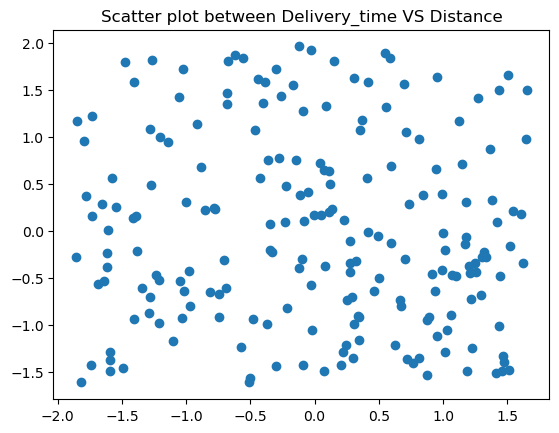

In [56]:
plt.scatter(x='Delivery_Time',y='Distance',data=df)
plt.title('Scatter plot between Delivery_time VS Distance')
plt.show()

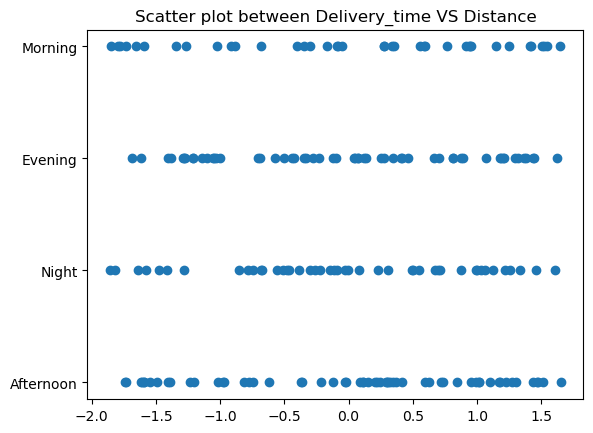

In [57]:
plt.scatter(x='Delivery_Time',y='Order_Time',data=df)
plt.title('Scatter plot between Delivery_time VS Distance')
plt.show()

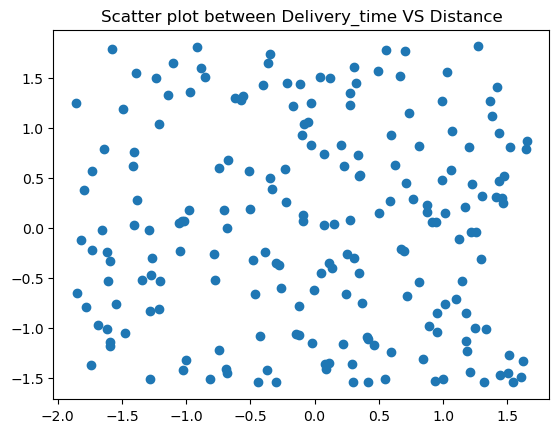

In [58]:
plt.scatter(x='Delivery_Time',y='Tip_Amount',data=df)
plt.title('Scatter plot between Delivery_time VS Distance')
plt.show()

Visualize the results using confusion matrices and ROC curves

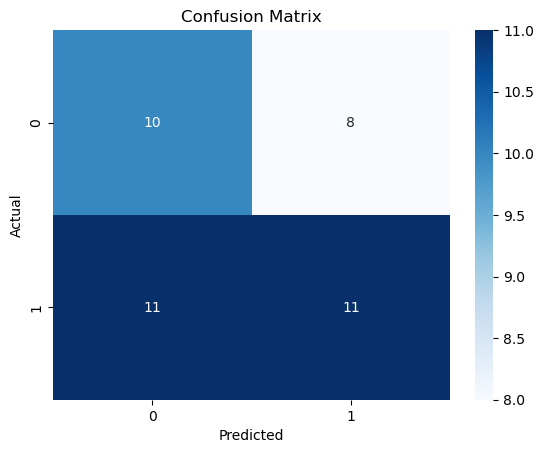

In [78]:
cm=confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


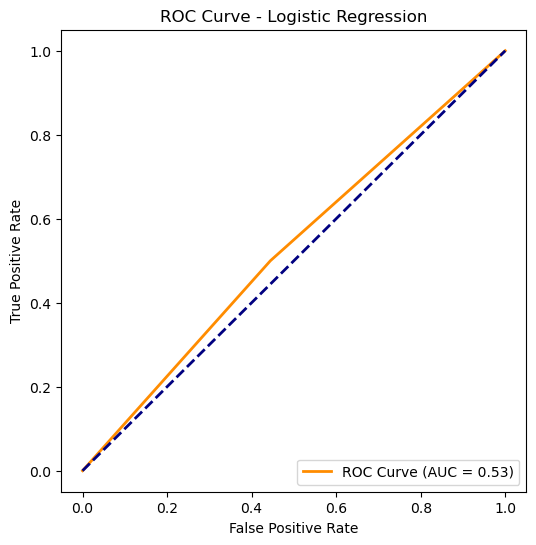

In [79]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

#REPORT
Compare the Linear Regression and Logistic Regression models based on their performance (e.g., accuracy, confusion matrix).
Linear regression r2_score using polynomial features degree 3 is 35% and degree 4 is 98% and without polynomial feature it is in minus and Logistic Regression accuracy is 55% using cross validation cv=6 and without this 52% accuracy is there.
Compare the Linear Regression and Logistic Regression models based on their performance (e.g., accuracy, confusion matrix).
Linear regression r2_score using polynomial features degree 3 is 35% and degree 4 is 98% and without polynomial feature it is in minus and Logistic Regression accuracy is 55% using cross validation cv=6 and without this 52% accuracy is there.
for Logistic Regression only roc and confusion metrix because this is classification problem not regression model
1.Manage peak hours 2.Optimize delivery Routes Use route Optimization algorithm or google API to shorter and faster route 3.Increase staff during peak traffic hours 4.provide training to delivery staff for smooth and timely deliveries 5.Monitor the staff and continuously improve them